# Demo: Hyperparameter-Tuning with Hyperopt

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_moons, make_classification, load_boston
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from matplotlib import pyplot as plt
%matplotlib inline

np.random.seed(1)

In [104]:
boston = load_boston()

In [105]:
features = boston['data']
target = boston['target']
cols = boston['feature_names']

In [121]:
boston_df = pd.DataFrame(features, columns=cols)
boston_df['PRICE'] = target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [122]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

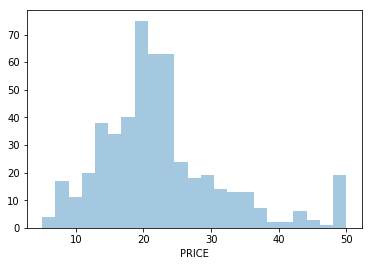

In [125]:
sns.distplot(boston_df['PRICE'], kde=False)

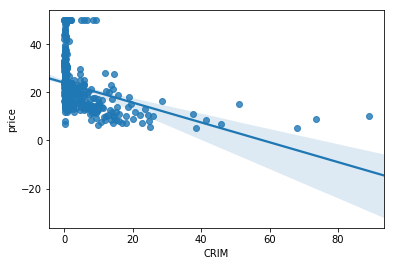

In [112]:
sns.regplot(data=boston_df, x='CRIM', y='price')

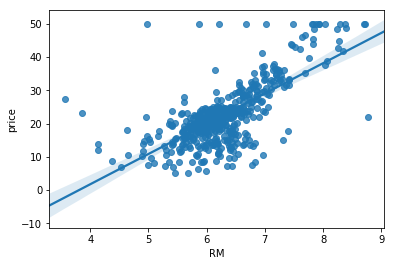

In [113]:
sns.regplot(data=boston_df, x='RM', y='price')

In [133]:
# train test
X_train, X_test, y_train, y_test = train_test_split(boston_df.drop('PRICE', axis=1), boston_df['PRICE'])

In [134]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.999843,11.879947,11.129129,0.073879,0.556366,6.280625,67.935092,3.835580,9.897098,413.124011,18.485224,354.087942,12.786095
std,9.498380,24.074003,6.771213,0.261919,0.119744,0.734339,28.401254,2.159167,8.854644,169.854382,2.125480,95.141832,7.175227
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.980000
25%,0.082325,0.000000,5.190000,0.000000,0.448000,5.884500,43.550000,2.094450,4.000000,284.000000,17.400000,374.170000,6.925000
50%,0.298190,0.000000,9.690000,0.000000,0.538000,6.193000,76.500000,3.317500,5.000000,334.000000,19.000000,391.230000,11.690000
75%,3.843270,12.500000,18.100000,0.000000,0.631000,6.600500,94.050000,5.164950,24.000000,666.000000,20.200000,396.100000,17.135000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


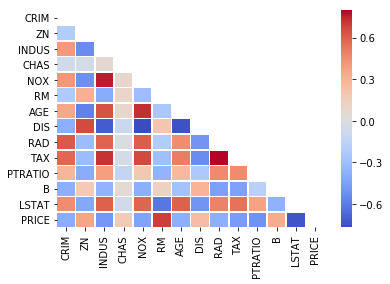

In [135]:
# solution
boston_corr = boston_df.corr()
mask = np.zeros_like(boston_corr)
# solution
mask[np.triu_indices_from(mask)] = True
# solution
ax = sns.heatmap(boston_corr, mask=mask, cmap='coolwarm', linewidths=0.5, vmax=.8)

In [136]:
from sklearn.ensemble import GradientBoostingRegressor

In [137]:
gb_reg = GradientBoostingRegressor()

In [138]:
gb_reg.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [139]:
cross_val_score(gb_reg, X_train, y_train, cv=3)

array([0.86623298, 0.88715479, 0.889404  ])

In [147]:
gb_grid = {'learning_rate': [0.001,0.005, 0.01,0.05, 0.1, 0.5, 1.0, 5.0], 'max_depth': [1,2,3,4,5,6,7,8,9,10]}

In [150]:
gb_gridSearch = GridSearchCV(gb_reg, gb_grid, cv=10, n_jobs=4)

In [151]:
gb_gridSearch.fit(X_train, y_train)

/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:715: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [153]:
gb_search_df = pd.DataFrame(gb_gridSearch.cv_results_)
gb_search_df.sort_values(by='rank_test_score')

/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
53,0.045587,0.000540,8.952564e-01,9.999953e-01,0.5,4,"{'learning_rate': 0.5, 'max_depth': 4}",1,9.395151e-01,9.999972e-01,...,9.222882e-01,9.999954e-01,9.309219e-01,9.999949e-01,9.250706e-01,9.999942e-01,0.003035,0.000025,5.847779e-02,1.421509e-06
45,0.071821,0.000819,8.935492e-01,9.998030e-01,0.1,6,"{'learning_rate': 0.1, 'max_depth': 6}",2,9.272423e-01,9.997804e-01,...,8.878071e-01,9.997987e-01,9.217202e-01,9.997933e-01,9.541051e-01,9.998303e-01,0.001262,0.000557,5.200434e-02,3.144396e-05
35,0.079900,0.000636,8.908624e-01,9.980217e-01,0.05,6,"{'learning_rate': 0.05, 'max_depth': 6}",3,9.252872e-01,9.979501e-01,...,9.017804e-01,9.982795e-01,8.810163e-01,9.980471e-01,9.441162e-01,9.975299e-01,0.002473,0.000028,4.823214e-02,3.040038e-04
34,0.062814,0.000621,8.900851e-01,9.941176e-01,0.05,5,"{'learning_rate': 0.05, 'max_depth': 5}",4,9.236390e-01,9.940049e-01,...,8.829579e-01,9.951780e-01,9.254381e-01,9.942443e-01,9.343939e-01,9.931547e-01,0.001492,0.000130,5.190601e-02,6.368465e-04
43,0.044418,0.000552,8.889492e-01,9.944093e-01,0.1,4,"{'learning_rate': 0.1, 'max_depth': 4}",5,9.260897e-01,9.946798e-01,...,8.775695e-01,9.952437e-01,9.333174e-01,9.940319e-01,9.488953e-01,9.943924e-01,0.001289,0.000090,6.428108e-02,4.095261e-04
44,0.058509,0.000576,8.882597e-01,9.987544e-01,0.1,5,"{'learning_rate': 0.1, 'max_depth': 5}",6,9.291992e-01,9.986402e-01,...,8.818819e-01,9.988496e-01,9.216010e-01,9.986866e-01,9.461512e-01,9.986978e-01,0.001612,0.000035,6.312206e-02,8.673247e-05
36,0.098599,0.000703,8.868825e-01,9.994808e-01,0.05,7,"{'learning_rate': 0.05, 'max_depth': 7}",7,9.067781e-01,9.994922e-01,...,8.749602e-01,9.995330e-01,8.993701e-01,9.994967e-01,9.257374e-01,9.992631e-01,0.001540,0.000031,4.139578e-02,7.866771e-05
42,0.034778,0.000505,8.857292e-01,9.832000e-01,0.1,3,"{'learning_rate': 0.1, 'max_depth': 3}",8,9.272517e-01,9.827043e-01,...,8.430047e-01,9.831795e-01,9.340859e-01,9.829549e-01,9.415749e-01,9.845016e-01,0.001114,0.000030,5.770488e-02,8.541352e-04
33,0.047154,0.000538,8.845372e-01,9.844197e-01,0.05,4,"{'learning_rate': 0.05, 'max_depth': 4}",9,9.230124e-01,9.842406e-01,...,8.733466e-01,9.857416e-01,9.165607e-01,9.839741e-01,9.342655e-01,9.837765e-01,0.000397,0.000027,5.447861e-02,9.158186e-04
46,0.092321,0.000684,8.824259e-01,9.999762e-01,0.1,7,"{'learning_rate': 0.1, 'max_depth': 7}",10,9.138260e-01,9.999729e-01,...,8.825541e-01,9.999809e-01,8.789639e-01,9.999632e-01,9.229208e-01,9.999809e-01,0.003778,0.000030,4.436975e-02,6.310212e-06


In [154]:
class HyperOptSearch():
    
    def __init__(self,model, X, y, space):
        self.model = model
        self.X= X
        self.y = y
        self.space = space
        
        self.best_model = None
        self.best_params = None
        self.best = None
        
    def objective(self, params):
        self.model.set_params(**params)
        shuffle = KFold(n_splits=3, shuffle=True)
        score = cross_val_score(self.model, self.X, self.y,
                                cv=shuffle, scoring='neg_mean_squared_error',
                                n_jobs=1, verbose=1)
        return score.mean()
        
        
    def retrain_best_model(self):
        print("retraining model with full data ...\n")
        self.model.set_params(**self.best_params)
        self.model.fit(self.X, self.y)
        print("...done\n")
        self.best_model = self.model
        
    def run(self, max_evals, algo):
        self.trials = Trials()
        self.best = fmin(self.objective,
                         self.space,
                         algo=algo,
                         max_evals=max_evals,
                         trials=self.trials,
                         verbose=True)
        self.best_params = space_eval(self.space, self.best)